# Pymaceuticals Inc.
---

* In this assignment, we were tasked with generating tables and figures needed for the technical report of an animal study on the performance of Pymaceuticals’ drug, Capomulin, against the other treatment regimens on 249 mice. <br>
* There was almost an even distribution of male and female mice that were tested. This could be done to study if the drug affects sexes differently. <br>
* Mice treated with Capomulin had the smallest mean tumor size compared to other mice who were treated with the other drug regimens. Mice treated with Infubinol had some the larget mean tumor sizes. <br>
* As time increased, the tumor volume decreased for mice treated with Capomulin. This suggest that the use of Capomulin can help mitigate tumor sizes <br>
* There is a positive correlation between mouse weight and average tumor weight: 0.84. <br>
* There is only one outlier  
---
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_merge_df = pd.merge(study_results, mouse_metadata, how="outer", on="Mouse ID")

# Display the data table for preview
mouse_merge_df

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        b128          5           45.651331                 0    Capomulin   
2        b128         10           43.270852                 0    Capomulin   
3        b128         15           43.784893                 0    Capomulin   
4        b128         20           42.731552                 0    Capomulin   
...       ...        ...                 ...               ...          ...   
1888     m601         25           33.118756                 1    Capomulin   
1889     m601         30           31.758275                 1    Capomulin   
1890     m601         35           30.834357                 1    Capomulin   
1891     m601         40           31.378045                 1    Capomulin   
1892     m601         45           28.430964                 1    Capomulin   

         Sex  Age_months  Weight (g)  
0     Female           9          22  
1     Female           9          22  
2     Female           9          22  
3     Female           9          22  
4     Female           9          22  
...      ...         ...         ...  
1888    Male          22          17  
1889    Male          22          17  
1890    Male          22          17  
1891    Male          22          17  
1892    Male          22          17  

[1893 rows x 8 columns]

In [2]:
# Checking the number of mice.
unique_mice = mouse_merge_df["Mouse ID"].unique()
unique_mice
total_mice = len(unique_mice)
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicates = mouse_merge_df.loc[mouse_merge_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
mouse_duplicates

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# I will think about this later ;)

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_merge_df[mouse_merge_df["Mouse ID"].isin(mouse_duplicates)==False]
clean_mouse_df

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        b128          5           45.651331                 0    Capomulin   
2        b128         10           43.270852                 0    Capomulin   
3        b128         15           43.784893                 0    Capomulin   
4        b128         20           42.731552                 0    Capomulin   
...       ...        ...                 ...               ...          ...   
1888     m601         25           33.118756                 1    Capomulin   
1889     m601         30           31.758275                 1    Capomulin   
1890     m601         35           30.834357                 1    Capomulin   
1891     m601         40           31.378045                 1    Capomulin   
1892     m601         45           28.430964                 1    Capomulin   

         Sex  Age_months  Weight (g)  
0     Female           9          22  
1     Female           9          22  
2     Female           9          22  
3     Female           9          22  
4     Female           9          22  
...      ...         ...         ...  
1888    Male          22          17  
1889    Male          22          17  
1890    Male          22          17  
1891    Male          22          17  
1892    Male          22          17  

[1880 rows x 8 columns]

In [6]:
# Checking the number of mice in the clean DataFrame.
total_clean_mouse_df = len(clean_mouse_df.groupby("Mouse ID").count())
total_clean_mouse_df

248

In [7]:
clean_mouse_df.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_df = clean_mouse_df.groupby("Drug Regimen")

tumor_volume_mean = tumor_df["Tumor Volume (mm3)"].mean()
tumor_volume_median = tumor_df["Tumor Volume (mm3)"].median()
tumor_volume_var = tumor_df["Tumor Volume (mm3)"].var()
tumor_volume_std = tumor_df["Tumor Volume (mm3)"].std()
tumor_volume_sem = tumor_df["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary DataFrame.
tumor_summary_df = pd.DataFrame ({"Tumor Mean" : tumor_volume_mean,
                                 "Tumor Median" : tumor_volume_median,
                                 "Tumor Variance" :tumor_volume_var,
                                 "Tumor Standard Deviance" :tumor_volume_std,
                                 "Tumor Standard Error of the Mean" :tumor_volume_sem
                                 })

tumor_summary_df

Tumor Mean  Tumor Median  Tumor Variance  \
Drug Regimen                                             
Capomulin      40.675741     41.557809       24.947764   
Ceftamin       52.591172     51.776157       39.290177   
Infubinol      52.884795     51.820584       43.128684   
Ketapril       55.235638     53.698743       68.553577   
Naftisol       54.331565     52.509285       66.173479   
Placebo        54.033581     52.288934       61.168083   
Propriva       52.320930     50.446266       43.852013   
Ramicane       40.216745     40.673236       23.486704   
Stelasyn       54.233149     52.431737       59.450562   
Zoniferol      53.236507     51.818479       48.533355   

              Tumor Standard Deviance  Tumor Standard Error of the Mean  
Drug Regimen                                                             
Capomulin                    4.994774                          0.329346  
Ceftamin                     6.268188                          0.469821  
Infubinol                    6.567243                          0.492236  
Ketapril                     8.279709                          0.603860  
Naftisol                     8.134708                          0.596466  
Placebo                      7.821003                          0.581331  
Propriva                     6.622085                          0.544332  
Ramicane                     4.846308                          0.320955  
Stelasyn                     7.710419                          0.573111  
Zoniferol                    6.966589                          0.516398

In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_drug_regimen= tumor_df["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std","sem"])


# Assemble the resulting series into a single summary DataFrame.
tumor_summary_df = pd.DataFrame ({"Tumor Mean" : tumor_volume_mean,
                                 "Tumor Median" : tumor_volume_median,
                                 "Tumor Variance" :tumor_volume_var,
                                 "Tumor Standard Deviance" :tumor_volume_std,
                                 "Tumor Standard Error of the Mean" :tumor_volume_sem
                                 })



tumor_drug_regimen

mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

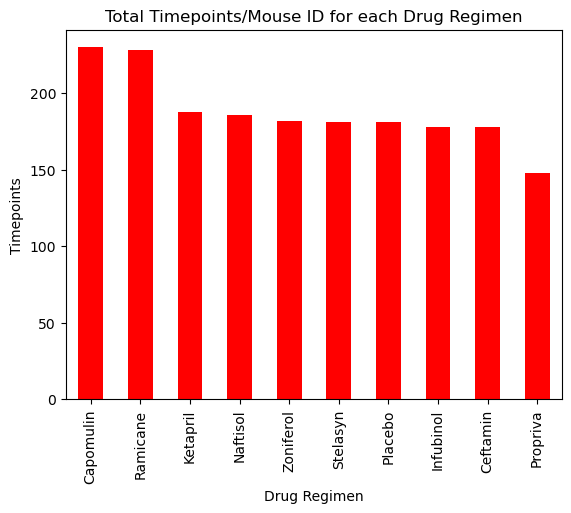

<Figure size 640x480 with 0 Axes>

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#Calculate drug regimen timepoints 
bar_mouse = (clean_mouse_df["Drug Regimen"].value_counts().plot.bar(color='r', align="center"))

# Use DataFrame.plot() in order to create a bar chart of the data and format
bar_mouse.set_xlabel("Drug Regimen")
bar_mouse.set_ylabel("Timepoints")
bar_mouse.set_title("Total Timepoints/Mouse ID for each Drug Regimen")

plt.show()
plt.tight_layout()


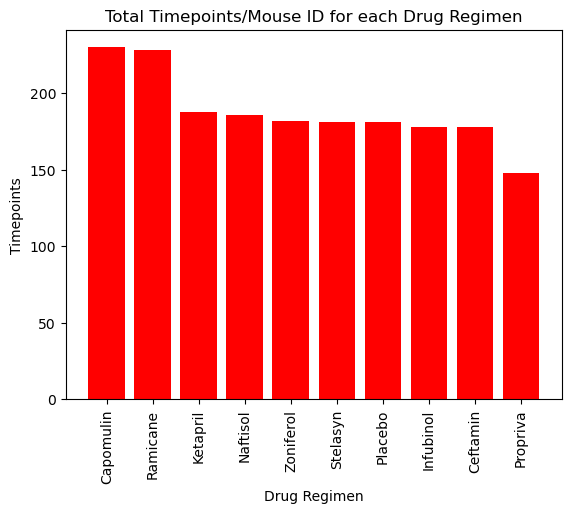

<Figure size 640x480 with 0 Axes>

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

counts = clean_mouse_df["Drug Regimen"].value_counts()
x_axis = np.arange(len(counts))

plt.bar(x_axis, counts, color='r', align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)
plt.xticks(rotation=90)

#Format and plot 
plt.title("Total Timepoints/Mouse ID for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.show()
plt.tight_layout()

<Axes: title={'center': 'Male Mice vs Female Mice'}>

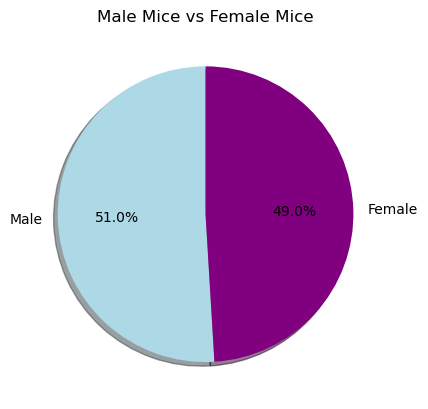

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# The values of each section of the pie chart
mouse_gender= clean_mouse_df["Sex"].value_counts()

# The colors of each section of the pie chart
colors = ["lightblue","purple"]

#Format pie chart and plot
mouse_plot = mouse_gender.plot.pie(colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90, title = "Male Mice vs Female Mice", ylabel="")

mouse_plot

(-1.0999999844482924,
 1.0999999100756188,
 -1.0999999297639522,
 1.0999999966554264)

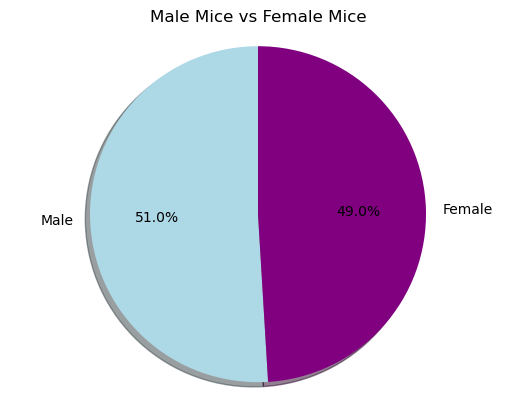

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
colors = ["lightblue","purple"]

#Find distribution of mice genders
mouse_gender= clean_mouse_df["Sex"].value_counts()

#Format pie chart and plot
plt.pie(mouse_gender, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Male Mice vs Female Mice")

plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_mouse_df.groupby("Mouse ID")["Timepoint"].max().reset_index().rename(columns={'Timepoint': 'Max Timepoint'})
greatest_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_mouse_df = pd.merge(clean_mouse_df, greatest_timepoint, on="Mouse ID", how ="left")
merged_mouse_df

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        b128          5           45.651331                 0    Capomulin   
2        b128         10           43.270852                 0    Capomulin   
3        b128         15           43.784893                 0    Capomulin   
4        b128         20           42.731552                 0    Capomulin   
...       ...        ...                 ...               ...          ...   
1875     m601         25           33.118756                 1    Capomulin   
1876     m601         30           31.758275                 1    Capomulin   
1877     m601         35           30.834357                 1    Capomulin   
1878     m601         40           31.378045                 1    Capomulin   
1879     m601         45           28.430964                 1    Capomulin   

         Sex  Age_months  Weight (g)  Max Timepoint  
0     Female           9          22             45  
1     Female           9          22             45  
2     Female           9          22             45  
3     Female           9          22             45  
4     Female           9          22             45  
...      ...         ...         ...            ...  
1875    Male          22          17             45  
1876    Male          22          17             45  
1877    Male          22          17             45  
1878    Male          22          17             45  
1879    Male          22          17             45  

[1880 rows x 9 columns]

In [20]:
# Put treatments into a list for for loop (and later for plot labels)
drug_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plottingi98\
tumor_volume_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_names:
    
    tumor_df = merged_mouse_df.loc[merged_mouse_df["Drug Regimen"] == drug]
    tumor_volume_final = tumor_df.loc[tumor_df["Timepoint"] == tumor_df["Max Timepoint"]]
    tumor_volumes = tumor_volume_final["Tumor Volume (mm3)"]
    tumor_volume_data.append(tumor_volumes)

    
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    
    quartiles = merged_mouse_df["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

# Determine outliers using upper and lower bounds

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)


C:\Users\Theresa\AppData\Local\Temp\ipykernel_5836\1636465646.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(drug_names)


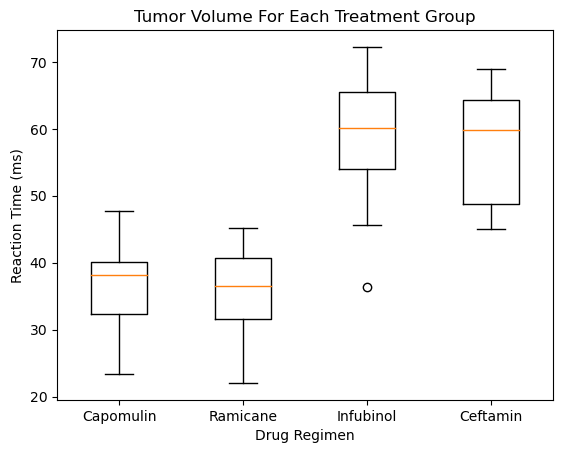

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

mouse_plot, ax1 = plt.subplots()

#Get current axes
ax = plt.gca()
ax.set_xticklabels(drug_names)

#Create labels and title
ax1.set_title("Tumor Volume For Each Treatment Group")
ax1.set_ylabel('Reaction Time (ms)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_volume_data)

plt.show()

## Line and Scatter Plots

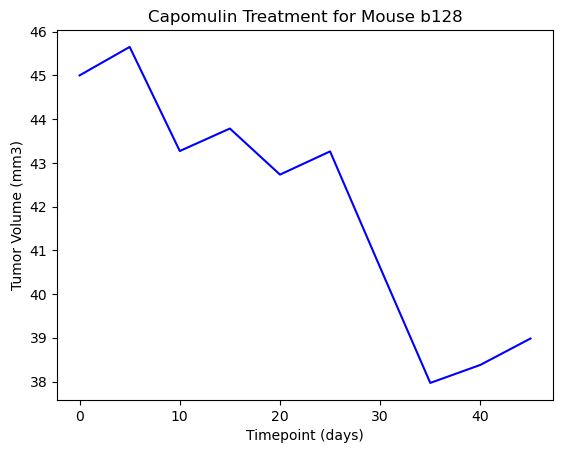

In [22]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = mouse_merge_df.loc[mouse_merge_df["Mouse ID"] == "b128"]

#Calculate timepoints and tumor volumes for Capomulin
timepoint_capomulin = capomulin["Timepoint"]
volume_capomulin = capomulin["Tumor Volume (mm3)"]

#Format line plot and label axis 
plt.plot(timepoint_capomulin, volume_capomulin, color="blue")
plt.title("Capomulin Treatment for Mouse b128")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

# Show the chart
plt.show()

C:\Users\Theresa\AppData\Local\Temp\ipykernel_5836\4176827889.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_volume = capomulin_data.groupby(["Mouse ID"]).mean()


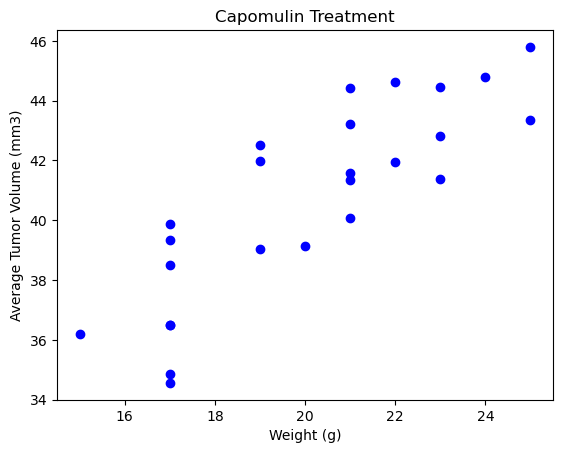

In [23]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = mouse_merge_df.loc[mouse_merge_df["Drug Regimen"] == "Capomulin"]
average_volume = capomulin_data.groupby(["Mouse ID"]).mean()

#Calculate average tumor volume and average weight for mice treated with Capomulin
average_tumor_volume = average_volume["Tumor Volume (mm3)"]
average_weight = average_volume["Weight (g)"]

#Format and plot data
plt.scatter(average_weight,average_tumor_volume, marker="o", color="blue")
plt.title("Capomulin Treatment")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


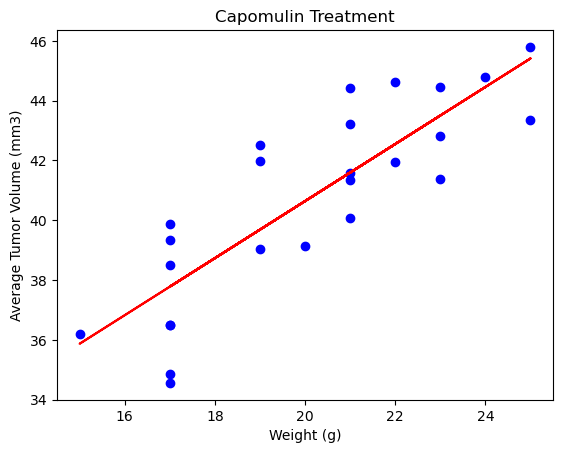

In [24]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#Use Correlation formula given in class examples
correlation = st.pearsonr(average_weight,average_tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

#Calculate linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(average_weight,average_tumor_volume)
regress_values = average_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Format line, scatter plots, label axis, and title
plt.scatter(average_weight,average_tumor_volume, marker="o", color="blue")
plt.plot(average_weight,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Capomulin Treatment")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()